In [1]:
!pip install gym[classic_control]
!pip install tqdm
!pip install gym[box2d]

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import gym
import random
from tqdm import tqdm
import matplotlib.pyplot as plt 
import random
import math
# import progressbar
import time

/home/rahul/.local/lib/python3.6/site-packages/gym/core.py:26: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [3]:
env_name = "Acrobot-v1"
render_Mode = "human"
# env = gym.make(env_name)

In [4]:
def getAngle(cos_val, sin_val):   
    a_acos = math.acos(cos_val)
    angle = 0
    if sin_val < 0:
        angle = math.degrees(-a_acos) % 360
    else: 
        angle = math.degrees(a_acos)
    return angle

In [5]:
def transformObs(obs):
    ang1 = int(getAngle(obs[0], obs[1])/5)
    ang2 = int(getAngle(obs[2], obs[3])/5)
    new_obs = []
    new_obs.append(ang1)
    new_obs.append(ang2)
    new_obs.append(int((obs[4] + 12.57)))
    new_obs.append(int((obs[5] + 28.28)))
    return new_obs

In [6]:
val_func = [[[[0 for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [7]:
next_state = [[[[[(-1, -1, -1, -1) for _ in range(3)] for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [8]:
gamma = 0.8

In [9]:
def performEpisode(alpha):
    Acrobot = gym.make(env_name)
#     Acrobot = gym.make(env_name, render_mode=render_Mode)
    pre_obs = Acrobot.reset()
    
    pre_obs = transformObs(pre_obs)
    done = False
    tot_reward = 0
    while not done:
        a, b, c, d = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        act = random.randint(0, 2) 
        pre_obs, reward, done, info = Acrobot.step(act)
        tot_reward += reward
        pre_obs = transformObs(pre_obs)
        a_n, b_n, c_n, d_n = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        next_state[a][b][c][d][act] = (a_n, b_n, c_n, d_n)
        val_func[a][b][c][d] = val_func[a][b][c][d] + alpha*(reward + gamma*val_func[a_n][b_n][c_n][d_n] - val_func[a][b][c][d])
    Acrobot.close() 

In [10]:
def getReward():
    Acrobot = gym.make(env_name)
    pre_obs = Acrobot.reset() 
    pre_obs = transformObs(pre_obs)
    done = False
    tot_reward = 0
    while not done:
        a, b, c, d = int(pre_obs[0]), int(pre_obs[1]), int(pre_obs[2]), int(pre_obs[3])
        
        req_act = random.randint(0, 2)   
        max_val = -200000000000
        for act in range(0, 3):
            a_n, b_n, c_n, d_n = next_state[a][b][c][d][act]
            if a_n!=-1 and b_n!=-1 and c_n!=-1 and d_n!=-1:
                if val_func[a_n][b_n][c_n][d_n] >= max_val:
                    max_val = val_func[a_n][b_n][c_n][d_n]
                    req_act = act 
 
        pre_obs, reward, done, info = Acrobot.step(req_act)
        tot_reward += reward
        pre_obs = transformObs(pre_obs)   
    Acrobot.close() 
    return tot_reward

In [11]:
def reset_vals():
    val_func = [[[[0 for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]
    next_state = [[[[[(-1, -1, -1, -1) for _ in range(3)] for _ in range(57)] for _ in range(26)] for _ in range(72)] for _ in range(72)]

In [12]:
x_rew = []
avg_reww_0_6 = []
avg_reww_0_7 = []
# avg_reww_0_2 = []
avg_reww_0_9 = []

for cnt in tqdm (range (160000), desc="Loading…", ascii=False, ncols=100):
    performEpisode(0.6)
    if cnt>0 and cnt%1600 == 0:
        rew = 0
        for _ in range(200):
            rew += getReward()
        avg_reww_0_6.append(rew/200)    
        x_rew.append(cnt/1600)
        
reset_vals()        
for cnt in tqdm (range (160000), desc="Loading…", ascii=False, ncols=100):
    performEpisode(0.7)
    if cnt>0 and cnt%1600 == 0:
        rew = 0
        for _ in range(200):
            rew += getReward()
        avg_reww_0_7.append(rew/200)    

# reset_vals()        
# for cnt in tqdm (range (200000), desc="Loading…", ascii=False, ncols=100):
#     performEpisode(0.2)
#     if cnt>0 and cnt%2000 == 0:
#         rew = 0
#         for _ in range(200):
#             rew += getReward()
#         avg_reww_0_2.append(rew/200)
        
reset_vals()        
for cnt in tqdm (range (160000), desc="Loading…", ascii=False, ncols=100):
    performEpisode(0.9)
    if cnt>0 and cnt%1600 == 0:
        rew = 0
        for _ in range(200):
            rew += getReward()
        avg_reww_0_9.append(rew/200)        

Loading…:   0%|                                                          | 0/160000 [00:00<?, ?it/s]/home/rahul/.local/lib/python3.6/site-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/home/rahul/.local/lib/python3.6/site-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=

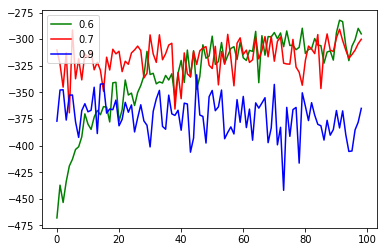

In [14]:
# plt.plot(x_rew, avg_reww)
# plt.xlabel("Episodes")
# plt.ylabel("Average Reward")
# plt.show()
fig, ax = plt.subplots()

ax.plot(avg_reww_0_6, color = 'green', label = '0.6')
ax.plot(avg_reww_0_7, color = 'red', label = '0.7')
# ax.plot(avg_reww_0_2, color = 'violet', label = '0.2')
ax.plot(avg_reww_0_9, color = 'blue', label = '0.9')
ax.legend(loc = 'upper left')
plt.show()